In [3]:
import pandas as pd
import numpy as np
import scipy.linalg as sla
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

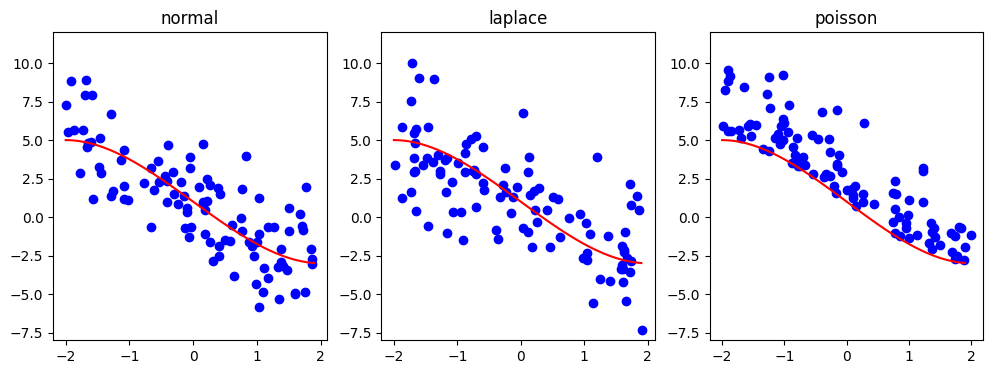

In [2]:
from scipy.stats import norm, laplace, expon

def f(x):
    return 0.25*x**3 - 3*x + 1

xx = np.arange(-2, 2, 0.1)
yy = f(xx)
N = 100

plt.figure(figsize=(12, 4))

for i, (rvs_func, name) in enumerate([
  (norm.rvs(loc=0, scale=1, size=N, random_state=None), 'normal'),
  (laplace.rvs(loc=0, size=N, random_state=None), 'laplace'),
  (expon.rvs(size=N, random_state=None), 'poisson'),
]):
    
    plt.subplot(1,3,i+1)
    plt.title(name)
    plt.ylim(-8,12)
    X = np.random.rand(N)*4 - 2
    Y = f(X) + 2*rvs_func

    plt.scatter(X, Y, color='blue')
    plt.plot(xx, yy, color='red')

$$y = f_w(x) + \varepsilon,$$

$$y|x \sim p(y|x),\quad \mathbb{E}(y|x) = f_w(x)$$

  Мы считаем $f_w(x)$, дальше ищем экспоненциальное распределение со средним $f_w(x)$. Матожидание экспоненциального распределения с параметром $\lambda$ равна $\frac1{\lambda}$, так что нам нужно распределение $\exp\left(\frac1{f_w(x)}\right)$

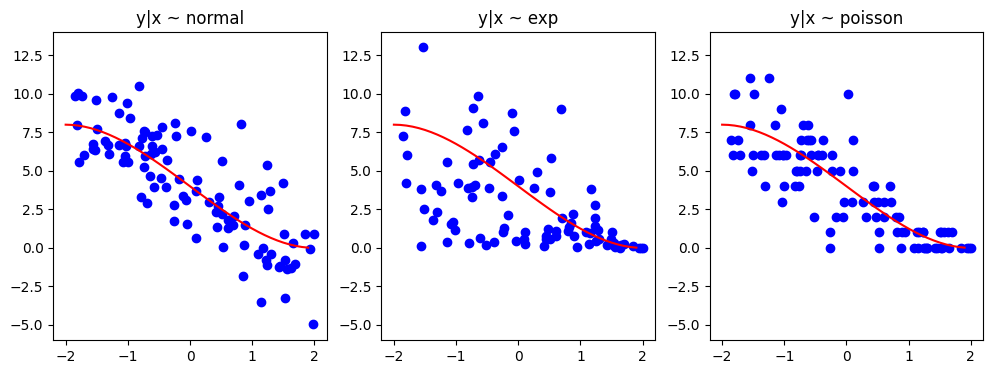

In [3]:
from scipy.stats import norm, expon, poisson

def f(x):
    return 0.25*x**3 - 3*x + 4

xx = np.arange(-2, 2, 0.1)
yy = f(xx)
N = 100
X = np.random.rand(N)*4 - 2

plt.figure(figsize=(12, 4))
  
for i, (Y, name) in enumerate([
    (norm.rvs(loc=f(X), scale=2, size=N), 'y|x ~ normal'),
    (expon.rvs(loc=0, scale=f(X), size=N), 'y|x ~ exp'),
    (poisson.rvs(mu=f(X), size=N), 'y|x ~ poisson'),
]):
    plt.subplot(1,3,i+1)
    plt.title(name)
    plt.ylim(-6,14)

    plt.scatter(X, Y, color='blue')
    plt.plot(xx, yy, color='red')

GLM
$$\mathbb{E}(y|x) = g^{-1}(\langle x, w\rangle)$$

In [4]:
data = pd.read_csv('./elon_tweets.csv', index_col=0)

In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.head()

,id,n_mentions,n_urls,tweet_length,MONTH,DAY_OF_WEEK,DAY,HOUR,favorite_count,tfidf_000,...,tfidf_worldandscience,tfidf_worth,tfidf_wow,tfidf_wrong,tfidf_wsj,tfidf_yeah,tfidf_year,tfidf_years,tfidf_yes,tfidf_zero
created_at,,,,,,,,,,,,,,,,,,,,,
2019-03-16 20:05:14+00:00,1107009951266824192,2,0,191,3,5,16,20,7271,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-16 20:10:50+00:00,1107011362423599104,3,0,214,3,5,16,20,1401,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-16 20:38:07+00:00,1107018227727491073,3,0,312,3,5,16,20,1420,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-16 20:45:24+00:00,1107020062177714176,2,0,68,3,5,16,20,4001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-16 20:53:52+00:00,1107022190426247168,3,0,153,3,5,16,20,742,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2883 entries, 2019-03-16 20:05:14+00:00 to 2020-03-10 05:53:48+00:00
Columns: 509 entries, id to tfidf_zero
dtypes: float64(500), int64(9)
memory usage: 11.2 MB


In [8]:
def change_categoricals(the_data, list_of_cat_vars):
    # print(the_data.columns)
    for cat_var in list_of_cat_vars:
        df = pd.get_dummies(the_data[cat_var], prefix=cat_var)
        df = df.drop(df.columns[-1], axis=1)
    
        the_data = the_data.drop(cat_var, axis=1)
        the_data = pd.concat((the_data, df), axis=1)
    
    return the_data

list_of_cat_vars = ['MONTH', 'DAY_OF_WEEK', 'DAY', 'HOUR']
data = change_categoricals(data, list_of_cat_vars)

In [9]:
data

,id,n_mentions,n_urls,tweet_length,favorite_count,tfidf_000,tfidf_10,tfidf_100,tfidf_1000,tfidf_12,...,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22
created_at,,,,,,,,,,,,,,,,,,,,,
2019-03-16 20:05:14+00:00,1107009951266824192,2,0,191,7271,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2019-03-16 20:10:50+00:00,1107011362423599104,3,0,214,1401,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2019-03-16 20:38:07+00:00,1107018227727491073,3,0,312,1420,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2019-03-16 20:45:24+00:00,1107020062177714176,2,0,68,4001,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2019-03-16 20:53:52+00:00,1107022190426247168,3,0,153,742,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-10 05:29:52+00:00,1237249292080943105,1,0,24,646,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2020-03-10 05:45:59+00:00,1237253347729645569,1,0,29,2949,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2020-03-10 05:50:03+00:00,1237254367939563520,2,0,20,1663,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data_train = data[data.index < '2020-02-01']
data_val = data[(data.index >= '2020-02-01') & (data.index < '2020-02-15')]
data_test = data[(data.index >= '2020-02-15') & (data.index < '2020-03-01')]

In [11]:
y_train = data_train['favorite_count'].values.astype(int)//100
X_train = data_train.drop(columns=['favorite_count', 'id'])

y_val = data_val['favorite_count'].values.astype(int)//100
X_val = data_val.drop(columns=['favorite_count', 'id'])

y_test = data_test['favorite_count'].values.astype(int)//100
X_test = data_test.drop(columns=['favorite_count', 'id'])

In [12]:
X_train.columns

Index(['n_mentions', 'n_urls', 'tweet_length', 'tfidf_000', 'tfidf_10',
       'tfidf_100', 'tfidf_1000', 'tfidf_12', 'tfidf_13ericralph31',
       'tfidf_20',
       ...
       'HOUR_13', 'HOUR_14', 'HOUR_15', 'HOUR_16', 'HOUR_17', 'HOUR_18',
       'HOUR_19', 'HOUR_20', 'HOUR_21', 'HOUR_22'],
      dtype='object', length=573)

c:\Users\Tikhon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


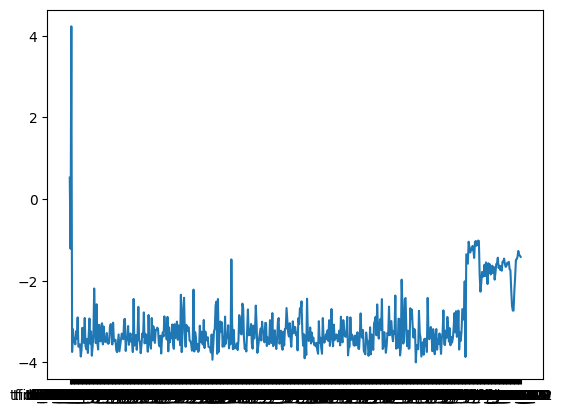

In [13]:
plt.plot(np.log(X_train.std(axis=0)))

In [13]:
X_train['intercept'] = [1]*X_train.shape[0]
X_val['intercept'] = [1]*X_val.shape[0]
X_test['intercept'] = [1]*X_test.shape[0]

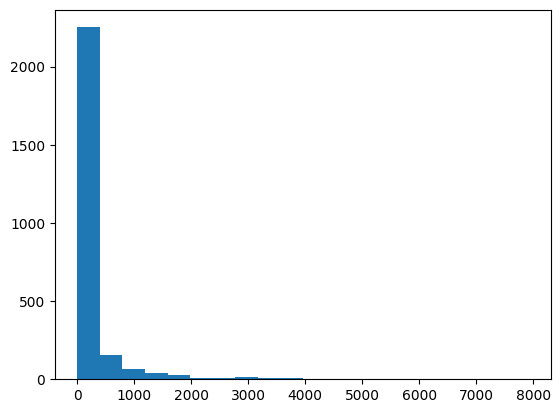

In [15]:
plt.hist(y_train, bins=20)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)

In [18]:
lin_model.coef_

array([-8.57786723e+01, -4.53137607e+02, -2.17786984e-01, -1.15446977e+00,
       -1.25459789e+02, -1.34182419e+02, -3.70254279e+00,  3.76470984e+01,
        7.54150176e+02, -7.90100811e+01,  4.90428632e+01, -7.18226983e+02,
        3.40204101e+01, -8.89249886e+01, -1.95621036e+12, -1.52227264e+02,
       -3.77683805e+01, -3.25698430e+02, -2.81512211e+02,  8.23803495e+02,
        5.65724085e+01,  5.36682832e+02,  2.33349003e+00, -1.81894923e+02,
        3.63392092e+02, -3.58595723e+00, -1.34596978e+02, -6.42361954e+01,
        1.11277524e+02,  2.27200945e+02, -3.17583167e+02,  1.24750458e+01,
       -1.25701621e+02,  3.80509174e+02,  9.28178406e+00, -1.86960945e+02,
       -3.46867447e+02, -1.04573292e+02,  9.13028318e+02,  1.16733438e+02,
        1.25672811e+03,  1.54305496e+01, -3.43194896e+02,  4.47560490e+02,
        2.11975542e+02, -1.98048473e+02, -1.58434072e+02,  4.80909233e+01,
       -1.26931196e+02, -1.24961054e+02,  1.12110475e+02, -1.89671925e+02,
        1.36238125e+02,  

c:\Users\Tikhon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.474e+05, tolerance: 9.227e+04
  model = cd_fast.enet_coordinate_descent(


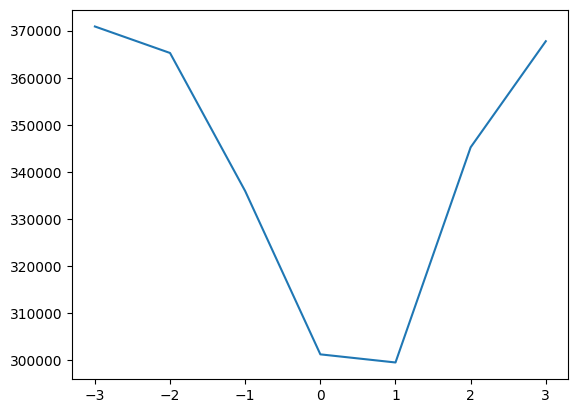

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


val = KFold(n_splits= 20)
X = pd.concat((X_train, X_val, X_test), axis=0)
y = np.concatenate([y_train, y_val, y_test])
reg_coef = np.logspace(-3, 3, 7, base=10.)
# reg_coef = np.linspace(0.5, 10, 100)
score = []
for reg_ in reg_coef:
    model = Lasso(alpha=reg_, fit_intercept= True)
    score.append(-cross_val_score(model, X_train, y_train, cv=val, scoring = 'neg_mean_squared_error').mean())

plt.plot(np.arange(-3,4), score)
plt.show()

In [31]:
best_reg_coef = reg_coef[np.argmin(score)]

model = Lasso(alpha = best_reg_coef, fit_intercept= True, max_iter=10000)
model = model.fit(X_train, y_train)
print(X_train.columns)
print(model.coef_)

Index(['n_mentions', 'n_urls', 'tweet_length', 'tfidf_000', 'tfidf_10',
       'tfidf_100', 'tfidf_1000', 'tfidf_12', 'tfidf_13ericralph31',
       'tfidf_20',
       ...
       'HOUR_14', 'HOUR_15', 'HOUR_16', 'HOUR_17', 'HOUR_18', 'HOUR_19',
       'HOUR_20', 'HOUR_21', 'HOUR_22', 'intercept'],
      dtype='object', length=574)
[-8.24547824e+01 -1.97470074e+02 -7.96144005e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -

In [32]:
best_reg_coef

10.0

In [33]:
res = ''
for idx in (np.abs(model.coef_) > 1e-10).nonzero()[0]:
    res += X_train.columns[idx] + ','
print(res)

n_mentions,n_urls,tweet_length,tfidf_https,


In [ ]:
res = ''
for idx in idxs:
    res += X_train.columns[idx] + ','
print(res)

$$y = \langle x, w\rangle + \varepsilon,\ \varepsilon\sim\mathcal{N}(0, \sigma^2),$$

$$y = w_1x_1 + \sum_{i=2}^Dw_ix_i + \varepsilon,\ \varepsilon\sim\mathcal{N}(0, \sigma^2),$$

$$y = \sum_{i=2}^Dw_ix_i + \varepsilon,\ \varepsilon\sim\mathcal{N}(0, \sigma^2).$$

Стат гипотеза:

- $H_0$: $w_1 = 0$;
- $H_1$: $w_1 \ne 0$.

Если гипотеза $H_0$ отклоняется, то это значит, что есть статистические аргументы в пользу того, что $w_1$ значим. Если же гипотезу не получается отклонить, то коэффициент $w_1$ может быть не значим

Пусть $\widehat{w} = (X^TX)^{-1}X^Ty$ — оценка вектора весов, $y$ равен $Xw + \varepsilon$, где $Xw$ константа, а $\varepsilon\sim\mathcal{N}(0,\sigma^2)$, так что
    
$$y\sim\mathcal{N}(Xw, \sigma^2)$$
    
В свою очередь,
    
$$\widehat{w} = (X^TX)^{-1}X^Ty = \underbrace{(X^TX)^{-1}X^TXw}_{=w} + (X^TX)^{-1}X^T\varepsilon.$$
    
Константа плюс константа, умноженная на нормальное, имеет нормальное распределение. Матожидание второго слагаемого равно нулю, так что $$\mathbb{E}\widehat{w} = w$$ 
    
$$Cov(\widehat{w}) = (X^TX)^{-1}X^T\cdot \underbrace{Cov(\varepsilon)}_{=\sigma^2I}\cdot ((X^TX)^{-1}X^T)^T = \sigma^2(X^TX)^{-1}$$
    
Несмещённая оценка дисперсии:
    
$$\widehat{\sigma^2} = \frac1{N - D}\vert y - X\widehat{w}\vert^2$$

$\widehat{w}_i$ распределён нормально, его матожидание равно $w_i$, оценка его дисперсии имеет вид $\widehat{\sigma}^2\cdot[(X^TX)^{-1}]_{ii}$
    
$$\frac{\widehat{w}_i - w_i}{\widehat{\sigma}\sqrt{\cdot[(X^TX)^{-1}]_{ii}}}$$
    
имеет распределение Стьюдента $t_{N-D}$ с $N - D$ степенями свободы. Это позволяет нам написать доверительный интервал для $w_i$: $y_{1-\frac{\alpha}2}$ — квантиль $t_{N-D}$ уровня $1 - \frac{\alpha}2$, то доверительный интервал с уровнем доверия $1 - \alpha$ имеет вид
    
$$\widehat{w}_i - y_{1-\frac{\alpha}2}\widehat{\sigma}\sqrt{[(X^TX)^{-1}]_{ii}}\leqslant\widehat{w}_i + y_{1-\frac{\alpha}2}\widehat{\sigma}\sqrt{[(X^TX)^{-1}]_{ii}}$$
    
Доверительный интервал:
    
$$T = \frac{\widehat{w}_i}{\widehat{\sigma}\sqrt{\cdot[(X^TX)^{-1}]_{ii}}}\sim t_{N-D}$$
    
Если p-value < $\alpha$, то мы отклоняем гипотезу на уровне значимости $1 - \alpha$

In [18]:
index = 2 
X_train_ = np.array(X_train.values).astype(np.float64)
M = np.linalg.inv(X_train_.T.dot(X_train_) + 1e-14*np.eye(X_train_.shape[1]))
w_pred = M.dot(X_train_.T).dot(y_train)

T = (w_pred[index]) / (
    np.sqrt(np.sum( (X_train_.dot(w_pred) - y_train) ** 2) * M[index][index] /
    (X_train_.shape[0] - X_train_.shape[1]))
)

print('T statistic =', T)

T statistic = -0.5895192313492466


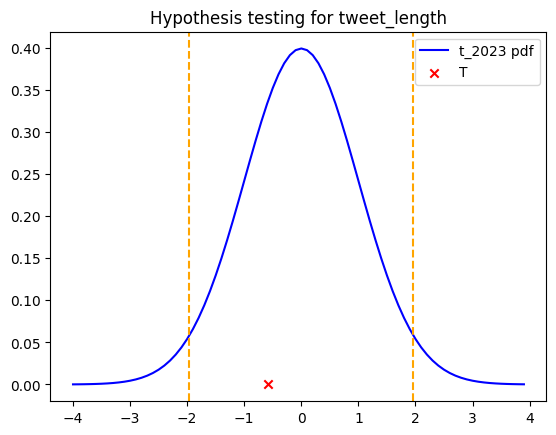

In [19]:
from scipy import stats

xx = np.arange(-4, 4, 0.1)
df = X_train.shape[0] - X_train.shape[1] # t distribution parameter

plt.title('Hypothesis testing for tweet_length')
plt.plot(xx, stats.t.pdf(xx, df),
         label='t_%d pdf'%(df), color='blue')
plt.scatter([T], [0], marker='x', color='red', label='T')
plt.axvline(x=stats.t.ppf(0.05/2, df),
           linestyle='--', color='orange')
plt.axvline(x=stats.t.ppf(1-0.05/2, df),
           linestyle='--', color='orange')
plt.legend()

In [20]:
p_value = stats.t.cdf(-np.abs(T), df) + (1 - stats.t.cdf(np.abs(T), df))
print(p_value)

0.55557884454687


In [21]:
import statsmodels.api as sm

In [23]:
sm_ols = sm.OLS(y_train, X_train_).fit()

In [34]:
len(sm_ols.pvalues)

574

In [32]:
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     2.328
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           5.96e-42
Time:                        05:19:12   Log-Likelihood:                -19690.
No. Observations:                2597   AIC:                         4.052e+04
Df Residuals:                    2026   BIC:                         4.387e+04
Df Model:                         570                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -85.7787     12.641     -6.786      0.000    -110.570     -60.987
x2          -453.1381     50.454     -8.981      0.000    -552.086    -354.190
x3            -0.2178      0.369     -0.590      0.555      -0.942       0.506
x4            -1.1330    547.486     -0.002      0.998   -1074.828    1072.562
x5          -125.4558    294.143     -0.427      0.670    -702.310     451.398
x6          -134.1533    420.953     -0.319      0.750    -959.700     691.394
x7            -3.6906    390.483     -0.009      0.992    -769.481     762.100
x8            37.6520    480.986      0.078      0.938    -905.627     980.932
x9           754.1754    384.797      1.960      0.050      -0.464    1508.815
x10          -79.0320    364.402     -0.217      0.828    -793.674     635.610
x11           49.0373    216.849      0.226      0.821    -376.232     474.307
x12         -718.2099    471.661     -1.523      0.128   -1643.200     206.781
x13           34.0464    521.198      0.065      0.948    -988.093    1056.186
x14          -88.9157    465.816     -0.191      0.849   -1002.444     824.613
x15          -17.5159    308.176     -0.057      0.955    -621.890     586.858
x16         -152.2430    480.568     -0.317      0.751   -1094.701     790.215
x17          -37.7684    265.013     -0.143      0.887    -557.495     481.958
x18         -325.6724    493.339     -0.660      0.509   -1293.176     641.831
x19         -281.5103    404.239     -0.696      0.486   -1074.277     511.257
x20          823.8171    216.561      3.804      0.000     399.111    1248.523
x21           56.5592    432.798      0.131      0.896    -792.215     905.334
x22          536.7193    500.883      1.072      0.284    -445.581    1519.020
x23            2.3352    350.223      0.007      0.995    -684.500     689.171
x24         -181.8897   1165.018     -0.156      0.876   -2466.649    2102.869
x25          363.3604    354.998      1.024      0.306    -332.839    1059.560
x26           -3.5723    212.865     -0.017      0.987    -421.030     413.885
x27         -134.5891    416.586     -0.323      0.747    -951.571     682.393
x28          -64.2583    309.324     -0.208      0.835    -670.885     542.368
x29          111.3105    600.605      0.185      0.853   -1066.557    1289.179
x30          227.2064    442.960      0.513      0.608    -641.498    1095.910
x31         -317.5664    334.413     -0.950      0.342    -973.395     338.263
x32           12.4738    110.669      0.113      0.910    -204.564     229.511
x33         -125.7167    256.127     -0.491      0.624    -628.017     376.584
x34          380.5168    600.018      0.634      0.526    -796.201    1557.234
x35            9.2833    156.121      0.059      0.953    -296.891     315.458
x36         -186.9801    426.157     -0.439      0.661   -1022.731     648.771
x3

In [36]:
idxs = (np.array(sm_ols.pvalues) < 0.05).nonzero()[0]
len(idxs)

34

In [37]:
res = ''
for idx in idxs:
    res += X_train.columns[idx] + ','
print(res)

n_mentions,n_urls,tfidf_actually,tfidf_area,tfidf_art,tfidf_color,tfidf_complete,tfidf_cybertruck,tfidf_day,tfidf_free,tfidf_game,tfidf_going,tfidf_happy,tfidf_home,tfidf_https,tfidf_insane,tfidf_life,tfidf_long,tfidf_oxygen,tfidf_simulation,tfidf_sounds,tfidf_travel,tfidf_video,tfidf_yes,MONTH_3,MONTH_4,MONTH_6,MONTH_7,MONTH_9,DAY_17,DAY_23,HOUR_1,HOUR_22,intercept,


In [79]:
features = np.array([len(X_train.columns) - 1], dtype=np.int32)

while len(features) < 40:
    min_aic = 10000000
    min_idx = 0
    buff_features = np.append(features, -100)
    for i in range(len(X_train.columns) - 1):
        if len(features[features == i]) > 0:
            continue
        buff_features[-1] = i
        sm_ols = sm.OLS(y_train, X_train_[:, buff_features]).fit()
        if (sm_ols.aic < min_aic):
            min_aic = sm_ols.aic
            min_idx = i
    features = np.append(features, min_idx)     
    print(len(features), min_aic)   

2 40271.82263477089
3 40146.80747663119
4 40036.111639912786
5 39951.0896061746
6 39923.100447256904
7 39897.24997188162
8 39878.19631931189
9 39861.26502373007
10 39849.75850545686
11 39839.141957981075
12 39830.129168844964
13 39821.435107825346
14 39812.95749385759
15 39806.24553691823
16 39799.46375471454
17 39793.106389310175
18 39786.95455415336
19 39782.83047449228
20 39778.70890657603
21 39774.69845460684
22 39770.83405474287
23 39767.31681041481
24 39763.8392866866
25 39760.97357451221
26 39758.36801710031
27 39755.699192922984
28 39753.24732122956
29 39751.466505951124
30 39749.88417521822
31 39748.31546380803
32 39746.74866092106
33 39745.09733615288
34 39743.46961821299
35 39742.14261979005
36 39740.88780879426
37 39739.45864357219
38 39738.20517401598
39 39736.99216495428
40 39735.76818417775


In [80]:
res = ''
print(len(set(features)))
for idx in features:
    res += X_train.columns[idx] + ','
print(res)

40
intercept,tfidf_https,n_mentions,n_urls,tfidf_cybertruck,tfidf_art,tfidf_insane,tfidf_game,tfidf_happy,tfidf_life,tfidf_actually,tfidf_free,tfidf_simulation,tfidf_orion_sword,tfidf_travel,tfidf_going,tfidf_oxygen,tfidf_area,MONTH_1,tfidf_color,tfidf_space,tfidf_complete,tfidf_video,tfidf_home,tfidf_light,tfidf_haha,tfidf_day,tfidf_shanghai,tfidf_mkbhd,tfidf_single,tfidf_twitter,MONTH_10,tfidf_way,tfidf_just,tfidf_13ericralph31,tweet_length,tfidf_nichegamer,tfidf_yes,tfidf_speed,tfidf_don,


In [82]:
predictors = [X_train.columns[idx] for idx in features]
predictors

['intercept',
 'tfidf_https',
 'n_mentions',
 'n_urls',
 'tfidf_cybertruck',
 'tfidf_art',
 'tfidf_insane',
 'tfidf_game',
 'tfidf_happy',
 'tfidf_life',
 'tfidf_actually',
 'tfidf_free',
 'tfidf_simulation',
 'tfidf_orion_sword',
 'tfidf_travel',
 'tfidf_going',
 'tfidf_oxygen',
 'tfidf_area',
 'MONTH_1',
 'tfidf_color',
 'tfidf_space',
 'tfidf_complete',
 'tfidf_video',
 'tfidf_home',
 'tfidf_light',
 'tfidf_haha',
 'tfidf_day',
 'tfidf_shanghai',
 'tfidf_mkbhd',
 'tfidf_single',
 'tfidf_twitter',
 'MONTH_10',
 'tfidf_way',
 'tfidf_just',
 'tfidf_13ericralph31',
 'tweet_length',
 'tfidf_nichegamer',
 'tfidf_yes',
 'tfidf_speed',
 'tfidf_don']

$$\log{p(y\mid X, w)} = -\frac{N}2\log(2\pi\sigma^2) - \frac1{2\sigma^2}\sum_{i=1}^N(y_i - \langle x_i, w\rangle)^2$$
    
Макс правдоподобие:
    
$$\widehat{\sigma}^2 = \frac{1}{N} \sum_{i=1}^N (y_i - \langle x_i, w\rangle)^2$$
    
Вообще говоря, эта оценка является смещённой. Несмещённая имеет вид
    
$$\widehat{\sigma}^2_{unbiased} = \frac{1}{N - D} \sum_{i=1}^N (y_i - \langle x_i, w\rangle)^2,$$
Правильным будет использовать для всех наборов признаков одну и ту же оценку $\widehat{\sigma}^2$, вычисленную на полном наборе признаков.


In [90]:
# predictors - это фичи, отобранные с помощью AIC на предыдущем шаге

sm_ols_robust = sm.OLS(y_train, np.array(X_train[predictors].values).astype(np.float64)).fit(cov_type='HC3')
sm_ols = sm.OLS(y_train, np.array(X_train[predictors].values).astype(np.float64)).fit()

In [93]:
robust = (np.array(sm_ols_robust.pvalues) < 0.05).nonzero()[0]
regular = (np.array(sm_ols.pvalues) < 0.05).nonzero()[0]
res_target = set(regular).difference(set(robust))
print(res_target)

{5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 19, 21, 22, 24, 25, 26, 27, 29, 32}


In [94]:
res = ''
print(len(predictors))
for idx in res_target:
    res += predictors[idx] + ','
print(res)

40
tfidf_art,tfidf_insane,tfidf_game,tfidf_happy,tfidf_life,tfidf_actually,tfidf_free,tfidf_simulation,tfidf_going,tfidf_oxygen,tfidf_area,tfidf_color,tfidf_complete,tfidf_video,tfidf_light,tfidf_haha,tfidf_day,tfidf_shanghai,tfidf_single,tfidf_way,


Распределение Пуассона

$$P(\xi = k) = \frac{\lambda^k}{k!}e^{-\lambda},$$

$$\mathbb{E}(y|x) = \langle x, w\rangle$$

Предсказание GLM будет иметь вид:

$$\mathbb{E}(y|x) = \exp(\langle x, w\rangle)$$

In [151]:
import numpy as np
from sklearn.base import RegressorMixin
from sklearn.utils import shuffle

class SGDPoissonRegression(RegressorMixin):
    def __init__(self, lr=0.01, momentum=1, delta_converged=1e-3, max_steps=1000, batch_size=64):
        self.lr = lr
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size
        self.momentum = momentum
        self.W = None

    def fit(self, X, Y):
        '''
        X: numpy.ndarray (n_samples, n_features)
        Y: numpy,ndarray (n_samples.)
        '''
        
        n_samples, n_features = X.shape

        batch_split_mask = [x for x in range(self.batch_size, n_samples, self.batch_size)]
        weights = np.zeros((n_features, 1))
        velocity = np.zeros((n_features, 1))
        num_steps = -1
        while (num_steps := num_steps + 1) < self.max_steps:
             
            X_step, y_step = shuffle(X, Y)
            X_batches, y_batches = np.split(X_step, batch_split_mask), np.split(y_step, batch_split_mask)
            for X_batch, y_batch in zip(X_batches, y_batches):
                curr_batch_len = len(y_batch)
                if curr_batch_len != self.batch_size:
                    continue
                exp_vector = np.exp(X_batch @ weights)
                gradient = (X_batch.T @ (exp_vector - y_batch.reshape(-1, 1)))/self.batch_size
                velocity = self.momentum * velocity + gradient
                weights -= self.lr * velocity
                if (np.linalg.norm(gradient) < self.delta_converged):
                    self.W = weights
                    return self
        
        self.W = weights
        return self

    def predict(self, X):
        '''
        X: numpy.ndarray (n_samples, n_features)
        returns: numpy.ndarray (n_samples,)
        '''
        return np.exp(X @ self.W).reshape(-1)

In [152]:
from scipy.stats import poisson

N = 200
D = 2
pathetic_X = np.random.rand(N, D)* 10
w = np.random.rand(D) * 1
pathetic_Y = (pathetic_X.dot(w) + np.random.randn(N)*0.05)

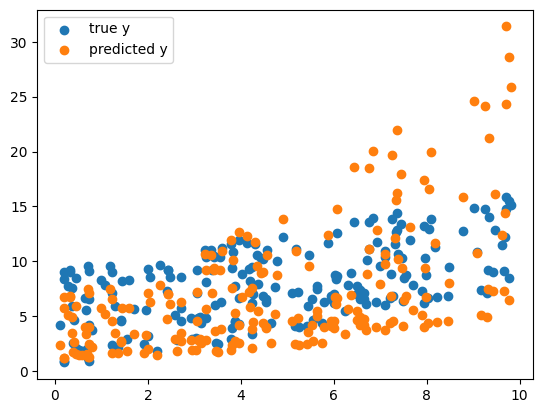

In [153]:
cclf = SGDPoissonRegression(lr=1e-6, batch_size=N, max_steps=10000, momentum=0.5)
cclf.fit(pathetic_X, pathetic_Y)

plt.scatter(pathetic_X[:,0], pathetic_Y, label='true y')
plt.scatter(pathetic_X[:,0], cclf.predict(pathetic_X), label='predicted y')
plt.legend()

In [158]:
from sklearn.metrics import mean_squared_error
sm_pois = sm.Poisson(y_train, np.array(X_train[predictors].values).astype(np.float64)).fit()
print(np.sqrt(mean_squared_error(sm_pois.predict(np.array(X_test[predictors].values).astype(np.float64)), y_test)))

Optimization terminated successfully.
         Current function value: 109.615694
         Iterations 12
453.1458207122366


In [14]:
from sklearn.datasets import make_classification
X_light, y_light = make_classification(n_samples=1000, n_features=200, 
                                       n_informative=2, n_redundant=50, n_repeated=0, n_classes=2, 
                                       n_clusters_per_class=2, weights=(0.8,0.2), random_state=42)

In [15]:
from sklearn.model_selection import train_test_split

X_light_train, X_light_test, y_light_train, y_light_test =\
    train_test_split(X_light, y_light, test_size=0.5, random_state=142, stratify=y_light)

Калибровка лог регрессии:

0.828


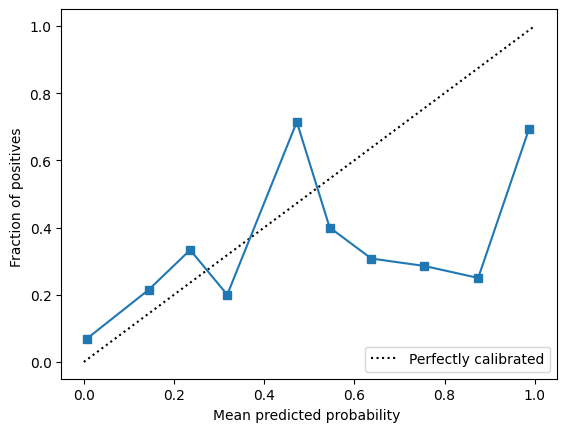

In [22]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression().fit(X_light_train, y_light_train)
print(accuracy_score(y_light_test, model.predict(X_light_test)))
prob_true, prob_pred = calibration_curve(y_light_test, model.predict_proba(X_light_test)[:, 1], n_bins=10)
disp_cabration = CalibrationDisplay(prob_true, prob_pred, model.predict_proba(X_light_test)[:, 1])
disp_cabration.plot()

In [152]:
arr = np.arange(20).reshape(5, 4)
ggg = [[1,4],[2,2]]
arr[ggg[1]]

array([[ 8,  9, 10, 11],
       [ 8,  9, 10, 11]])

Изотоническая регрессия

In [155]:
from sklearn.base import ClassifierMixin
from sklearn.base import clone
from sklearn.isotonic import IsotonicRegression
from functools import partial
import pandas as pd
import numpy as np

class IsotonicallyCalibratedModel(ClassifierMixin):
    def __init__(self, base_estimator=None, cv=None):
        if cv is None:
            self.num_folds = 5
            self.split_fold_func = partial(np.array_split, indices_or_sections = self.num_folds)
        elif type(cv) == int or type(cv) == float:
            self.num_folds = int(cv)
            self.split_fold_func = partial(np.array_split, indices_or_sections = self.num_folds)
        elif type(cv) == list:
            self.num_folds = len(cv)
            self.split_fold_func = None
            self.split_fold_idx = cv
        self.estimators = [clone(base_estimator) for i in range(self.num_folds)] 
        self.isoregs_list = [IsotonicRegression(y_min = 0., y_max = 1., out_of_bounds = 'clip') for i in range(self.num_folds)] 
    
    @staticmethod
    def v_stack(arr_1, arr_2):
        if len(arr_1) != 0:
            arr_1_stacked = np.vstack(arr_1)
            if len(arr_2) != 0:
                arr_2_stacked = np.vstack(arr_2)
                return np.vstack([arr_1_stacked, arr_2_stacked])
            else:
                return arr_1_stacked
        return np.vstack(arr_2)
        
    
    @staticmethod
    def concat(arr_1, arr_2):
        if len(arr_1) != 0:
            arr_1_concat = np.concatenate(arr_1)
            if len(arr_2) != 0:
                arr_2_concat = np.concatenate(arr_2)
                return np.concatenate([arr_1_concat, arr_2_concat])
            else:
                return arr_1_concat
        return np.concatenate(arr_2)
    
    def fit(self, X=None, y=None):
        if type(X) == pd.DataFrame:
            X = np.array(X.values)
        if type(y) == pd.Series:
            y = np.array(y)

        if self.split_fold_func is not None:
            K_folds_X = self.split_fold_func(X)
            K_folds_y = self.split_fold_func(y)
            K_sub_one_folds_X = [self.v_stack(K_folds_X[:i], K_folds_X[i + 1:]) for i in range(self.num_folds)]
            K_sub_one_folds_y = [self.concat(K_folds_y[:i], K_folds_y[i + 1:]) for i in range(self.num_folds)]
            self.estimators_fitted = [self.estimators[i].fit(K_sub_one_folds_X[i], K_sub_one_folds_y[i]) for i in range(self.num_folds)]
            self.isoregs_fitted = [self.isoregs_list[i].fit(self.estimators[i].predict_proba(K_folds_X[i])[:,1], K_folds_y[i]) for i in range(self.num_folds)]
        else:
            idx_train = [x[0] for x in self.split_fold_idx]
            idx_test = [x[1] for x in self.split_fold_idx]
            self.estimators_fitted = [est.fit(X[idxs], y[idxs]) for est, idxs in zip(self.estimators, idx_train)]
            self.isoregs_fitted = [self.isoregs_list[i].fit(self.estimators[i].predict_proba(X[idxs])[:,1], y[idxs]) for i, idxs in enumerate(idx_test)]

        return self
        
            
    def predict_proba(self, X=None):
        if type(X) == pd.DataFrame:
            X = np.array(X.values)
        proba_list = []
        for base_estimator, isotonic_regression in zip(self.estimators_fitted, self.isoregs_fitted):
            y_prob = base_estimator.predict_proba(X)[:,1]
            y_pred = isotonic_regression.predict(y_prob)
            proba_list.append(y_pred[:, None])
        proba_prediction = np.hstack(proba_list).mean(axis=1)[:, None]
        return np.hstack([1 - proba_prediction, proba_prediction])

    
    def predict(self, X=None):
        proba_prediction = self.predict_proba(X)[:, 1]
        return (proba_prediction > 0.5).astype(np.float64)


In [158]:
cv = [[[1,2,3,20,21,22],[1,10,11,12]], [[3,4,5,35,36,37],[6,13,14,15]]]
model = IsotonicallyCalibratedModel(base_estimator = LogisticRegression(), cv = cv)
model = model.fit(X_light_train, y_light_train)
accuracy_score(y_light_test, model.predict(X_light_test))

0.88